<a href="https://colab.research.google.com/github/Dilavarj7/Icc_data_analysis/blob/main/Dilavar_Singh_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. Plot the run worm graph of any one match.</b>

<br>




# <b><center> Sample Run Worm Graph </center></b>

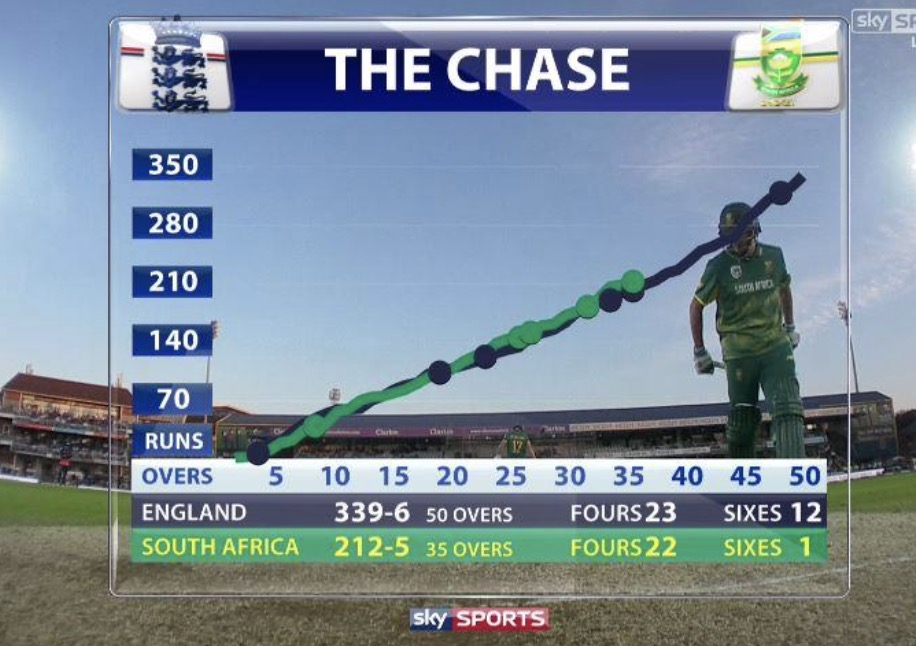

In [ ]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 1/Week 4/Day 6/dat/'
df = pd.read_csv(working_directory + 'International_T20_Data.csv')

In [ ]:
df.head(3)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eval(df.loc[0,'innings'])

In [ ]:
first_inning_dict=eval(df.loc[0,'innings'])[0]
second_inning_dict=eval(df.loc[0,'innings'])[1]

In [ ]:
first_inning_dict['1st innings'].keys()

dict_keys(['team', 'deliveries'])

In [ ]:
first_inning_dict['1st innings']['team']

'Australia'

In [ ]:
first_inning_dict['1st innings']['deliveries']

In [ ]:
len(first_inning_dict['1st innings']['deliveries'])

125

In [ ]:
first_inning_dict['1st innings']['deliveries'][0]

{0.1: {'batsman': 'AJ Finch',
  'bowler': 'SL Malinga',
  'non_striker': 'M Klinger',
  'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}

In [ ]:
first_inning_deliveries=first_inning_dict['1st innings']['deliveries']
second_inning_deliveries=second_inning_dict['2nd innings']['deliveries']

In [ ]:
#funtion wriiten here
def get_innings_score(inning_deliveries):
  total_runs=0
  inning_deliveries_df=pd.DataFrame(columns=['delivery','runs_scored'])
  for delivery in inning_deliveries:
    delivery_number=list(delivery.keys())[0]
    extras=delivery[delivery_number]['runs']['extras']
    total=delivery[delivery_number]['runs']['total']
    inning_deliveries_df=inning_deliveries_df.append({'delivery':delivery_number,'runs_scored':total} , ignore_index=True)

  inning_deliveries_df['over']=inning_deliveries_df['delivery'].apply(lambda s: int(s+1))

  inning_run_df=inning_deliveries_df.groupby('over').agg({'runs_scored':sum}).reset_index()
  inning_run_df['total_score']=inning_run_df['runs_scored'].cumsum()

  return inning_run_df
  

In [ ]:
#Calling function here to return the run scored dataframe
first_inning_run_df=get_innings_score(first_inning_deliveries)
second_inning_run_df=get_innings_score(second_inning_deliveries)

In [ ]:
first_inning_run_df['inning']='first'
second_inning_run_df['inning']='second'

In [ ]:
first_inning_run_df['team']=first_inning_dict['1st innings']['team']
second_inning_run_df['team']=second_inning_dict['2nd innings']['team']

In [ ]:
first_inning_run_df.head()

,over,runs_scored,total_score,inning,team
0,1,6.0,6.0,first,Australia
1,2,7.0,13.0,first,Australia
2,3,6.0,19.0,first,Australia
3,4,8.0,27.0,first,Australia
4,5,16.0,43.0,first,Australia


In [ ]:
second_inning_run_df.head()

,over,runs_scored,total_score,inning,team
0,1,5.0,5.0,second,Sri Lanka
1,2,10.0,15.0,second,Sri Lanka
2,3,7.0,22.0,second,Sri Lanka
3,4,24.0,46.0,second,Sri Lanka
4,5,5.0,51.0,second,Sri Lanka


In [ ]:
match_score=pd.concat([first_inning_run_df,second_inning_run_df])

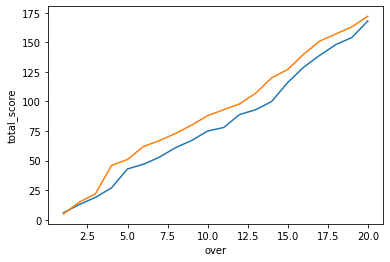

In [ ]:
#ploting linplot
sns.lineplot(data=first_inning_run_df, x='over' , y='total_score')
sns.lineplot(data=second_inning_run_df, x='over' , y='total_score')

Text(0.5, 1.0, 'Run Worn Graph')

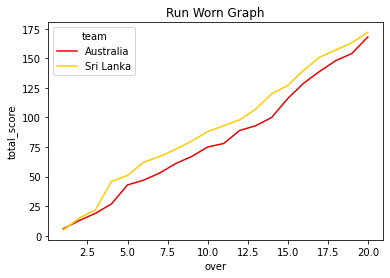

In [ ]:
sns.lineplot(x='over',y='total_score', data=match_score, hue='team', 
             style='team',palette='hot', dashes=False, legend='brief').set_title('Run Worn Graph')